# Tutorial 1 Homework
## Active Galactic Nuclei
### MASS S2

### Q1
Select galaxies and quasars with redshifts between $0.05$ and $0.3$ and signal to noise ratios greater than $35$ near the $H\beta$ line. Ensure that lines $[O-III]$ $\lambda \sim 5006 \mathring{A}$, $H\beta \lambda \sim 4863 \mathring{A}$, and $H\gamma \lambda \sim \mathring{4341}$ are present in the emission and that the FWHM of $H\beta$ is greater than $1000~$km/s. For each selected spectrum, find the flux ratios of $[O-III]/H\beta$, $H\beta /H\gamma$, and $[O-III]/ H\gamma$, as well as the equivalent width and flux of $H\beta$, redshift, and extinction correction: $E(B-V)$ of type SFD (tip: the last one find in galSpecInfo table).

### Answer

We will use two tables here, `SpecObj`, `GalSpecLine`, and `galSpecInfo`.

Some selections are simple, for instance specifying our desired $ 0.05 \leq z \leq 0.3$ and making sure S/N ratios in the $g$ band is $> 35$. We also note that some objects' emission line fluxes are $0$, which is presumably the case when those emission lines are not present. We will ensure that we only select objects with those emission lines preseny by specifying `oiii_5007_flux`, `h_beta_flux`, and `h_gamma_flux` $\neq 0$.

Tremonti et al. 2004 notes that the Balmer lines and Forbidden lines are fitted simultaniously as Gaussian curves. The `GalSpecLine` table provides us with $1 \sigma$ errors for emission lines, which can be used to set limits on the FWHMs of these lines. For a gaussian curve, the FWHM $\approx 2.335 \sigma$. To ensure that FWHM of $H\beta > 1000~$km/s, we ensure that $\sigma > \frac{1000}{2.335}~$km/s.

Our SQL query thus is:
```
SELECT
    s.z, s.snmedian_g,
    g.oiii_5007_flux, g.oiii_5007_eqw,
    g.h_beta_flux, g.h_beta_eqw,
    g.h_gamma_flux, g.h_gamma_eqw,
    g.sigma_balmer, i.e_bv_sfd
    
FROM SpecObj AS s
JOIN GalSpecLine AS g ON
    s.specobjid = g.specobjid
JOIN galSpecInfo as i ON
    s.specobjid = i.specobjid

WHERE
    (s.class = 'QSO' OR
    s.class = 'GALAXY')
AND s.z BETWEEN 0.05 AND 0.3
AND s.snmedian_g > 35
AND g.oiii_5007_flux != 0
AND g.h_beta_flux != 0
AND g.h_gamma_flux != 0
AND g.sigma_balmer > 1000/2.335
```

We then save the results as a CSV file to further calculate flux ratios.

In [1]:
import pandas as pd

In [2]:
df_q1 = pd.read_csv('q1.csv', skiprows=1)
df_q1

,z,snmedian_g,oiii_5007_flux,oiii_5007_eqw,h_beta_flux,h_beta_eqw,h_gamma_flux,h_gamma_eqw,sigma_balmer,e_bv_sfd
0,0.207596,42.06503,1040.57300,-7.561283,1538.25100,-8.412434,895.594200,-5.306871,500.0,0.028005
1,0.057217,37.65995,11.06479,-0.177496,52.07384,-0.387391,42.659310,-0.468916,500.0,0.026828
2,0.205535,37.90739,858.12100,-12.901270,1431.32200,-10.366620,790.969000,-7.349889,500.0,0.019416
3,0.073900,39.32929,6401.67800,-82.942090,2517.65600,-19.924880,1239.828000,-11.182270,500.0,0.032011
4,0.063550,52.27291,3924.68800,-26.149670,3590.22000,-11.709680,1967.854000,-7.929694,500.0,0.026815
...,...,...,...,...,...,...,...,...,...,...
277,0.234966,35.20954,1340.57800,-23.343770,802.04390,-9.961286,492.522500,-5.751487,500.0,0.050020
278,0.058971,45.00253,886.62250,-11.547200,2150.04500,-18.739770,1126.438000,-8.708666,500.0,0.021916
279,0.154811,40.58540,846.91250,-5.921784,3967.23700,-19.681560,1952.957000,-9.415924,500.0,0.016404
280,0.065175,38.82062,44.79085,-0.684254,-14.77804,0.175612,-8.931676,0.121405,500.0,0.118886


We'll add some columns for the required flux ratios.

In [3]:
df_q1['oiii/hb'] = df_q1['oiii_5007_flux'] / df_q1['h_beta_flux']
df_q1['hb/hg'] = df_q1['h_beta_flux'] / df_q1['h_gamma_flux']
df_q1['oiii/hg'] = df_q1['oiii_5007_flux'] / df_q1['h_gamma_flux']

df_q1

,z,snmedian_g,oiii_5007_flux,oiii_5007_eqw,h_beta_flux,h_beta_eqw,h_gamma_flux,h_gamma_eqw,sigma_balmer,e_bv_sfd,oiii/hb,hb/hg,oiii/hg
0,0.207596,42.06503,1040.57300,-7.561283,1538.25100,-8.412434,895.594200,-5.306871,500.0,0.028005,0.676465,1.717576,1.161880
1,0.057217,37.65995,11.06479,-0.177496,52.07384,-0.387391,42.659310,-0.468916,500.0,0.026828,0.212483,1.220691,0.259376
2,0.205535,37.90739,858.12100,-12.901270,1431.32200,-10.366620,790.969000,-7.349889,500.0,0.019416,0.599530,1.809580,1.084898
3,0.073900,39.32929,6401.67800,-82.942090,2517.65600,-19.924880,1239.828000,-11.182270,500.0,0.032011,2.542714,2.030649,5.163360
4,0.063550,52.27291,3924.68800,-26.149670,3590.22000,-11.709680,1967.854000,-7.929694,500.0,0.026815,1.093161,1.824434,1.994400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.234966,35.20954,1340.57800,-23.343770,802.04390,-9.961286,492.522500,-5.751487,500.0,0.050020,1.671452,1.628441,2.721861
278,0.058971,45.00253,886.62250,-11.547200,2150.04500,-18.739770,1126.438000,-8.708666,500.0,0.021916,0.412374,1.908711,0.787103
279,0.154811,40.58540,846.91250,-5.921784,3967.23700,-19.681560,1952.957000,-9.415924,500.0,0.016404,0.213477,2.031400,0.433657
280,0.065175,38.82062,44.79085,-0.684254,-14.77804,0.175612,-8.931676,0.121405,500.0,0.118886,-3.030906,1.654565,-5.014831


With relevant information included in the table, we'll save this as `q1_ans.csv`

In [19]:
df_q1.to_csv('q1_ans.csv')

### Q2

How many objects have you found? Which condition from the ones in WHERE is narrowing the results most severly?

### Answer

We'll run our query with each WHERE statement one at a time while using the `count(*)` function.

1) The query:
```
SELECT
    count(*)
    
FROM SpecObj AS s
JOIN GalSpecLine AS g ON
    s.specobjid = g.specobjid
JOIN galSpecInfo as i ON
    s.specobjid = i.specobjid

WHERE
    (s.class = 'QSO' OR s.class = 'GALAXY')
```

Yields 912908 results.

2) The query:
```
SELECT
    count(*)
    
FROM SpecObj AS s
JOIN GalSpecLine AS g ON
    s.specobjid = g.specobjid
JOIN galSpecInfo as i ON
    s.specobjid = i.specobjid

WHERE
    s.z BETWEEN 0.05 AND 0.3
```

Yields 676190 results.

3) The query:
```
SELECT
    count(*)
    
FROM SpecObj AS s
JOIN GalSpecLine AS g ON
    s.specobjid = g.specobjid
JOIN galSpecInfo as i ON
    s.specobjid = i.specobjid

WHERE
    s.snmedian_g > 35
```

Yields 90822 results.

4) The query:
```
SELECT
    count(*)
    
FROM SpecObj AS s
JOIN GalSpecLine AS g ON
    s.specobjid = g.specobjid
JOIN galSpecInfo as i ON
    s.specobjid = i.specobjid

WHERE
    g.oiii_5007_flux != 0
```

Yields 1254808 results.

5) The query:
```
SELECT
    count(*)
    
FROM SpecObj AS s
JOIN GalSpecLine AS g ON
    s.specobjid = g.specobjid
JOIN galSpecInfo as i ON
    s.specobjid = i.specobjid

WHERE
    g.h_beta_flux != 0
```

Yields 1254791 results.

6) The query:
```
SELECT
    count(*)
    
FROM SpecObj AS s
JOIN GalSpecLine AS g ON
    s.specobjid = g.specobjid
JOIN galSpecInfo as i ON
    s.specobjid = i.specobjid

WHERE
    g.h_gamma_flux != 0
```

Yields 1254350 results.

7) The query:
```
SELECT
    count(*)
    
FROM SpecObj AS s
JOIN GalSpecLine AS g ON
    s.specobjid = g.specobjid
JOIN galSpecInfo as i ON
    s.specobjid = i.specobjid

WHERE
    g.sigma_balmer > 1000/2.335
```

Yields 163300 results.

This shows that the WHERE statement constraining the S/N in the `g` band is the most constraining (`s.snmedian_g > 35`).

### Q3

Find out if there some objects under the subclass `AGN` objects, with the same conditions as Q1. Adapt your code to get results.

### Answer

We modify our code as follows:
```
SELECT
    s.z, s.snmedian_g,
    g.oiii_5007_flux, g.oiii_5007_eqw,
    g.h_beta_flux, g.h_beta_eqw,
    g.h_gamma_flux, g.h_gamma_eqw,
    g.sigma_balmer, i.e_bv_sfd
    
FROM SpecObj AS s
JOIN GalSpecLine AS g ON
    s.specobjid = g.specobjid
JOIN galSpecInfo as i ON
    s.specobjid = i.specobjid

WHERE
    s.subclass = 'AGN'
AND s.z BETWEEN 0.05 AND 0.3
AND s.snmedian_g > 35
AND g.oiii_5007_flux != 0
AND g.h_beta_flux != 0
AND g.h_gamma_flux != 0
AND g.sigma_balmer > 1000/2.335
```

And find that there are no enteries found.

### Q4

Modify your solution under Q1 to include objects with redshift between 0.05 and 0.6. Using this modified solution and the list of objects (`287-plate-MJD-fiber.txt`) submit the SQL query via CrossID.

### Answer

We run the SQL query:
```
SELECT
    s.plate, s.mjd, s.fiberid, s.z, s.z, s.snmedian_g,
    g.oiii_5007_flux, g.oiii_5007_eqw, g.h_beta_flux, g.h_beta_eqw,
    g.h_gamma_flux, g.h_gamma_eqw, g.sigma_balmer, i.e_bv_sfd

FROM #upload u
      JOIN SpecObjAll AS s ON (s.plate=u.up_plate AND s.mjd=u.up_mjd AND s.fiberID=u.up_fiber)
JOIN GalSpecLine AS g ON s.specobjid=g.specobjid
JOIN GalSpecInfo AS i ON s.specobjid=i.specobjid

WHERE
(s.class = "QSO" OR s.class = "GALAXY")
    AND s.z BETWEEN 0.05 AND 0.60
    AND s.snmedian_g > 35
    AND g.sigma_balmer > 1000/2.355
    AND g.h_beta_flux != 0
    AND g.h_gamma_flux != 0
    AND g.oiii_5007_flux != 0
```

This returns a table which is attached as `q4_ans.csv`

### Q5

We downloaded the `download_url.txt` file for the resulting spectra, and will download the spectra using `wget`.

In [6]:
%%bash
. ~/.bashrc
mkdir bulk_spectra


wget -i download_url.txt -P bulk_spectra/

mkdir: cannot create directory ‘bulk_spectra’: File exists
--2024-04-18 01:55:00--  https://data.sdss.org/sas/dr18/spectro/sdss/redux/26/spectra/lite/0268/spec-0268-51633-0235.fits
Resolving data.sdss.org (data.sdss.org)... 155.101.19.31
Connecting to data.sdss.org (data.sdss.org)|155.101.19.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172800 (169K) [application/octet-stream]
Saving to: ‘bulk_spectra/spec-0268-51633-0235.fits’

     0K .......... .......... .......... .......... .......... 29%  267K 0s
    50K .......... .......... .......... .......... .......... 59%  274K 0s
   100K .......... .......... .......... .......... .......... 88% 2.55M 0s
   150K .......... ........                                   100% 27.5M=0.4s

2024-04-18 01:55:01 (433 KB/s) - ‘bulk_spectra/spec-0268-51633-0235.fits’ saved [172800/172800]

--2024-04-18 01:55:01--  https://data.sdss.org/sas/dr18/spectro/sdss/redux/26/spectra/lite/0329/spec-0329-52056-0577.fits
Reusing ex

### Q5

BONUS: Read downloaded fits files and plot the spectra using Python.

### Answer

We'll plot one of our spectra.

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt

In [37]:
plt.style.use('seaborn-v0_8')
plt.style.use('seaborn-v0_8-colorblind')

In [9]:
hdul = fits.open('./bulk_spectra/spec-0329-52056-0577.fits')
hdul.info()

Filename: ./bulk_spectra/spec-0329-52056-0577.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     139   ()      
  1  COADD         1 BinTableHDU     26   3828R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   


In [23]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3828 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

In [33]:
data = hdul[1].data
flux_array = []
log_wavl_arr = []

for point in data:
    flux_array.append(point[0])
    log_wavl_arr.append(point[1])

<>:5: SyntaxWarning: invalid escape sequence '\A'
<>:5: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_68850/580375906.py:5: SyntaxWarning: invalid escape sequence '\A'
  plt.ylabel('Flux [$10^{-17} erg/cm^2/s/ \AA$]', size=15, labelpad=14)


Text(0.5, 1.0, 'Spectrum from spec-0329-52056-0577.fits')

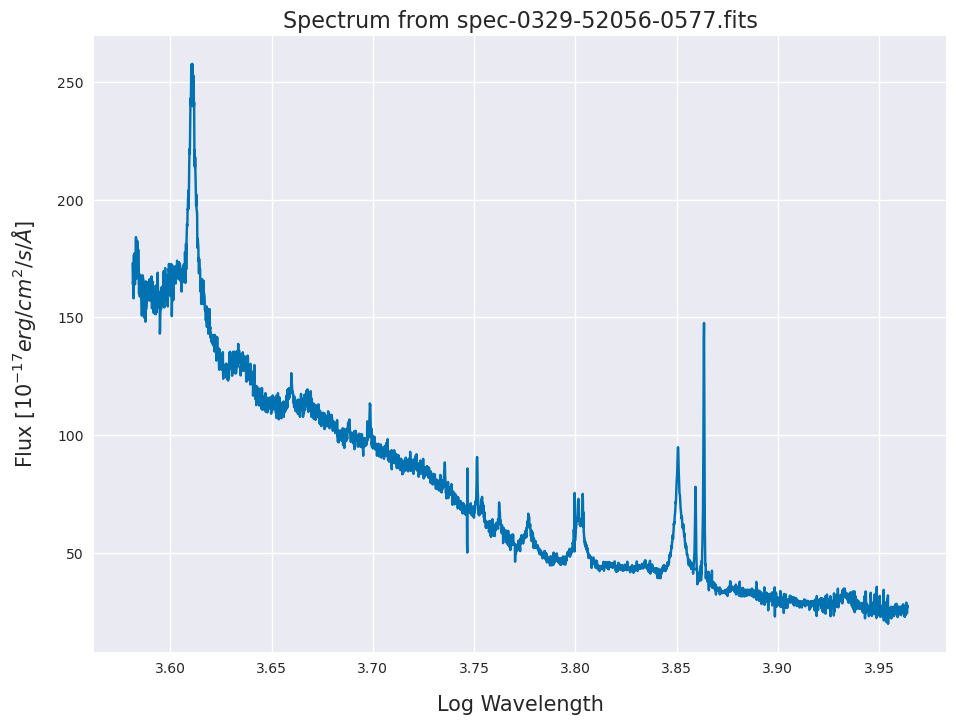

In [51]:
plt.figure(figsize=(11,8))

plt.plot(log_wavl_arr, flux_array)

plt.ylabel('Flux [$10^{-17} erg/cm^2/s/ \AA$]', size=15, labelpad=14)
plt.xlabel('Log Wavelength', size=15, labelpad=14)

plt.title('Spectrum from spec-0329-52056-0577.fits', size=16)